# MIMO for Event History

In [1]:
import numpy as np
import mdof
import quakeio
from mdof import modal, transform
from mdof.utilities import Config, extract_channels, print_modes

## Data inputs

In [2]:
# PAINTER RIO DELL TRANSVERSE (CASE 1)
station_id = 'CE89324'
chan_config_direction = 'Transverse'

In [3]:
directory = f"uploads/{station_id}/"
pattern  = "????????*.[zZ][iI][pP]"
from pathlib import Path
files = [file for file in Path(directory).glob(pattern)]

In [4]:
from uploads.channel_conf import CHANNEL_CONF
chan_conf = CHANNEL_CONF[station_id][chan_config_direction]
chan_conf

{'inputs': [3, 17, 20], 'outputs': [7, 9, 4]}

## Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`decimation`  | decimation (downsampling) factor
`order` | model order (2 times number of DOF)

### Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`horizon` | number of observability parameters, or prediction horizon
`nc` | number of controllability parameters

### Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`horizon` | number of steps used for identification, or prediction horizon

### Parameters for Mode Validation
parameter | value
----------|-------
`outlook` | number of steps used for temporal consistency in EMAC

In [5]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.horizon = 190
conf.nc = 190
conf.order  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.1,0.6)
conf.damping = 0.06
conf.pseudo = True
conf.outlook = 190
# conf.ss_decimation = 8

uploads/CE89324/bayview_11oct2013_72086051_ce89324p.zip
peak acceleration (cm/s/s): 0.08968811979625821
event date/time: 2013-10-11T23:05:00


100%|█████████▉| 11810/11811 [01:43<00:00, 113.75it/s]


okid-era
Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2658     0.000688   1.0        0.9632     0.9632   
      0.2366     0.007717   1.0        0.9661     0.9661   
      0.2033     -0.00318   1.0        0.6642     0.6642   
      0.1803     0.002733   1.0        0.9439     0.9439   
      0.1607     0.006827   1.0        0.5616     0.5616   
      0.1152     -0.001075  1.0        0.1855     0.1855   
Mean Period(s): 0.19363240039315352
Standard Dev(s): 0.04925948116890803
okid-era-dc
Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2647     0.003301   1.0        0.9739     0.9739   
      0.2371     0.01711    1.0        0.9751     0.9751   
      0.2024     -0.004284  1.0        0.5023     0.5023   
      0.1806     0.009005   1.0        0.9325     0.9325   
      0.1593     0.006441   1.0        0.7087     0.7087   
      0.1152     0.002991   1.0        0.2158     0.2158   
Mean Period(s): 0.19320509

100%|█████████▉| 6812/6813 [00:41<00:00, 163.91it/s]


okid-era
Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.5187     -0.04608   1.0        0.106      0.106    
      0.2428     0.006201   1.0        0.9949     0.9949   
      0.2161     -0.009799  1.0        0.989      0.989    
      0.1963     -0.006907  1.0        0.684      0.684    
      0.1818     1.153e-05  1.0        0.9149     0.9149   
      0.1694     0.004164   1.0        0.9637     0.9637   
Mean Period(s): 0.25419756252279496
Standard Dev(s): 0.12065606436692149
okid-era-dc
Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.5195     -0.04273   1.0        0.7651     0.7651   
      0.2428     0.008575   1.0        0.9979     0.9979   
      0.216      -0.00773   1.0        0.9756     0.9756   
      0.1961     -0.006786  1.0        0.7392     0.7392   
      0.1783     0.006042   1.0        0.6695     0.6695   
      0.1703     0.00258    1.0        0.8471     0.8471   
Mean Period(s): 0.25385038

100%|█████████▉| 8321/8322 [00:52<00:00, 159.78it/s]


okid-era
Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2272     -0.01515   1.0        0.8371     0.8371   
      0.1622     -0.0192    1.0        0.246      0.246    
      0.1444     -0.006557  1.0        0.5436     0.5436   
      0.02233    0.000159   1.0        0.9792     0.9792   
      0.022      0.0007976  1.0        0.9389     0.9389   
      0.02146    -0.0002445  1.0        0.924      0.924    
Mean Period(s): 0.0999415189778129
Standard Dev(s): 0.08196573872205819
okid-era-dc
Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2283     -0.01036   1.0        0.9107     0.9107   
      0.1624     -0.01896   1.0        0.2351     0.2351   
      0.1433     -0.007598  1.0        0.4352     0.4352   
      0.02233    0.0002221  1.0        0.9617     0.9617   
      0.02202    0.001489   1.0        0.9436     0.9436   
      0.02147    -0.0001248  1.0        0.9517     0.9517   
Mean Period(s): 0.0999798

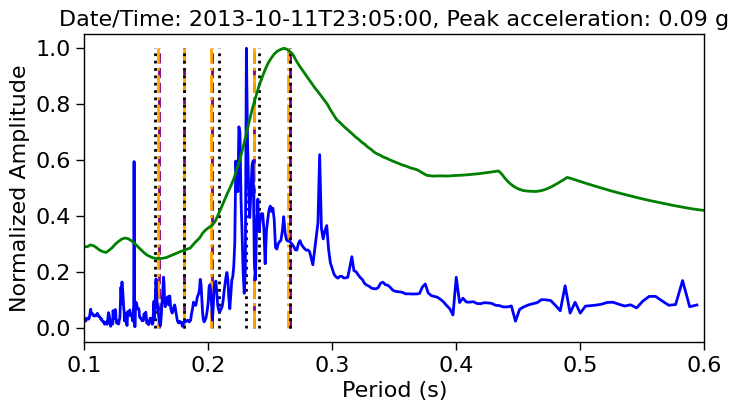

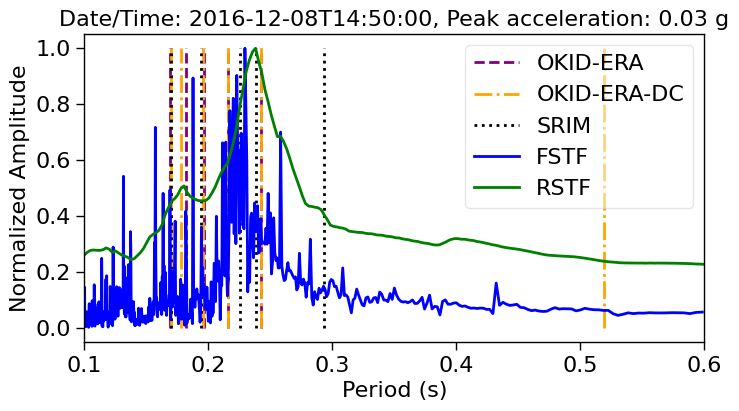

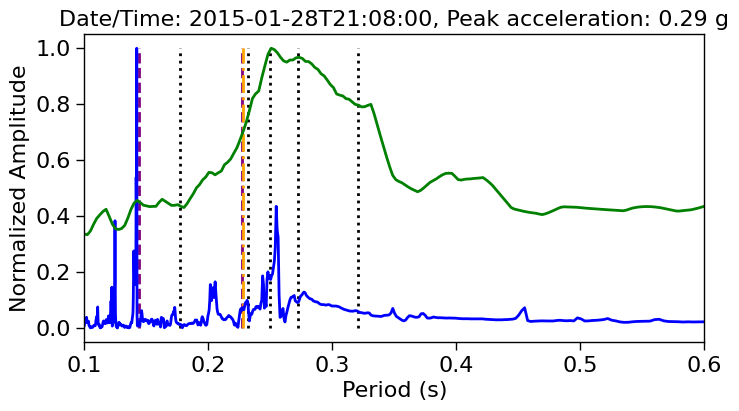

In [6]:
event_modes = []
from matplotlib import pyplot as plt

# fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
# axi = iter(axs)
methods = ["okid-era", "okid-era-dc", "srim"]
lstyles = ["dashed", "dashdot", "dotted"]
colors = ["purple", "orange", "black"]
realizations = {}
summary_table = {}

# for i, file in enumerate([files[0],files[-5]]):
for i, file in enumerate(files[:3]):
    # ax = next(axi) 
    fig, ax = plt.subplots(figsize=(8,4))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*"])#, "*date*"])
        peak_accel = np.abs(event['peak_accel']*0.0010197162129779)
        event_date = event['event_date']
        print("peak acceleration (cm/s/s):", peak_accel)
        print("event date/time:", event_date)
        inputs, dt = extract_channels(event, chan_conf['inputs'])
        outpts, dt = extract_channels(event, chan_conf['outputs'])
        summary_table[event_date] = {"peak acc": np.round((peak_accel),3)}
        for method in methods:
            realizations[method] = mdof.system(method=method, inputs=inputs, outputs=outpts, threads=18, chunk=200, **conf)
    except Exception as e:
        print(e)
        print(">>>>> Not read: ", file.name)
        continue
    for j,method in enumerate(methods):
        print(method)
        ss_modes = modal.system_modes(realizations[method],dt,**conf)
        ss_periods = [1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5]
        ax.vlines(ss_periods, 0, 1, linestyles=lstyles[j], color=colors[j], linewidth=2, label=f"{method.upper()}")# if i==0 else None)
        summary_table[event_date][method] = np.round(np.max(ss_periods),3) if len(ss_periods)>0 else np.nan
        print_modes(ss_modes)
    periods, amplitudes = transform.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    summary_table[event_date]['FSTF'] = np.round(modal.spectrum_modes(periods, amplitudes, prominence=0.1)[0][0],3)
    ax.plot(periods, amplitudes, label="FSTF", color="blue")
    periods, amplitudes = transform.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    summary_table[event_date]['RSTF'] = np.round(modal.spectrum_modes(periods, amplitudes, prominence=0.1)[0][0],3) if len(modal.spectrum_modes(periods, amplitudes)[0]) > 0 else np.nan
    ax.plot(periods, amplitudes, label="RSTF", color="green")
    ax.set_xlim(conf.period_band)
    ax.set_title(f"Date/Time: {event_date}, Peak acceleration: {np.round(peak_accel,2)} g")
    ax.set_xlabel("Period (s)")
    ax.set_ylabel("Normalized Amplitude")
    if i==1:
        ax.legend(loc='upper right', frameon=True, framealpha=0.5)

In [7]:
import pandas as pd
pd.DataFrame(summary_table).T

,peak acc,okid-era,okid-era-dc,srim,FSTF,RSTF
2013-10-11T23:05:00,0.090,0.266,0.265,0.266,0.400,0.261
2016-12-08T14:50:00,0.031,0.243,0.520,0.294,0.432,0.238
2015-01-28T21:08:00,0.291,0.227,0.228,0.321,0.277,0.251
